In [2]:
import pandas as pd
import src.utils as srcu
from src.linear_model import LinearRegressionPRML
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Cloud_Computing_cost_dataset.csv')
t = df['Monthly_Cloud_Cost'] # Separating out the target values

df = df.drop(columns='Monthly_Cloud_Cost')

# Converting dataframe into numpy type ndarray 
X = df.to_numpy()

''' Everything below just to see how things are working in Background. model.fit() will do it all behind the scene'''
# Standardizing the data

# X_standardized, mean, std = standardize_data(X)

# creating design matrix now
# phi = create_design_matrix(X_standardized, degree=3)

' Everything below just to see how things are working in Background. model.fit() will do it all behind the scene'

In [5]:
''' Now before we start applying the model we need to diffrentiate Training Data and Test Data from dataset'''

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.25, random_state=42)

# Standardizing the Training Dataset

X_train
X_train_standardized, train_mean, train_std = srcu.standardize_data(X_train)

X_test_standardized = (X_test - train_mean) / train_std # We always standardize Test Dataset based on mean and std of Training Dataset.

# Now training the model and fincding the optimal weights. 

model = LinearRegressionPRML()
model.fit(X_train_standardized, y_train)

model.weights

array([ 1.78845383e+04,  2.13167615e+03,  4.82576240e+02, -1.70766747e+00,
        6.87694614e+02,  2.01233722e+00,  5.95351157e+00,  1.51173225e+04,
        4.02399982e+03,  3.79152500e+00])

In [10]:
'''Now we see the test_erms and training_erms for different models, when degree changes'''

degrees_to_test = [1,2,3,4,5,6]

train_errors = [] # Every Degree gives us a different training error
test_errors = [] # Every Degree gives us a different test error
 
# Now running the experiment 

for d in degrees_to_test:

    model = LinearRegressionPRML(degree=d)

    # Training the model and finding weights
    model.fit(X_train_standardized, y_train)

    # Predicting on both training dataset and test dataset

    y_train_predicitons = model.predict(X_train_standardized)
    y_test_predictions = model.predict(X_test_standardized)

    training_data_erms = srcu.calculate_erms(y_train, y_train_predicitons)
    test_data_erms = srcu.calculate_erms(y_test, y_test_predictions)

    train_errors.append(training_data_erms)
    test_errors.append(test_data_erms)

    print(f"For Degree {d} | Train ERMS is: {training_data_erms:.2f} | Test ERMS: {test_data_erms:.2f}")


For Degree 1 | Train ERMS is: 3601.07 | Test ERMS: 3715.50
For Degree 2 | Train ERMS is: 252.36 | Test ERMS: 250.20
For Degree 3 | Train ERMS is: 252.30 | Test ERMS: 250.30
For Degree 4 | Train ERMS is: 252.20 | Test ERMS: 250.38
For Degree 5 | Train ERMS is: 252.19 | Test ERMS: 250.46
For Degree 6 | Train ERMS is: 252.10 | Test ERMS: 250.25


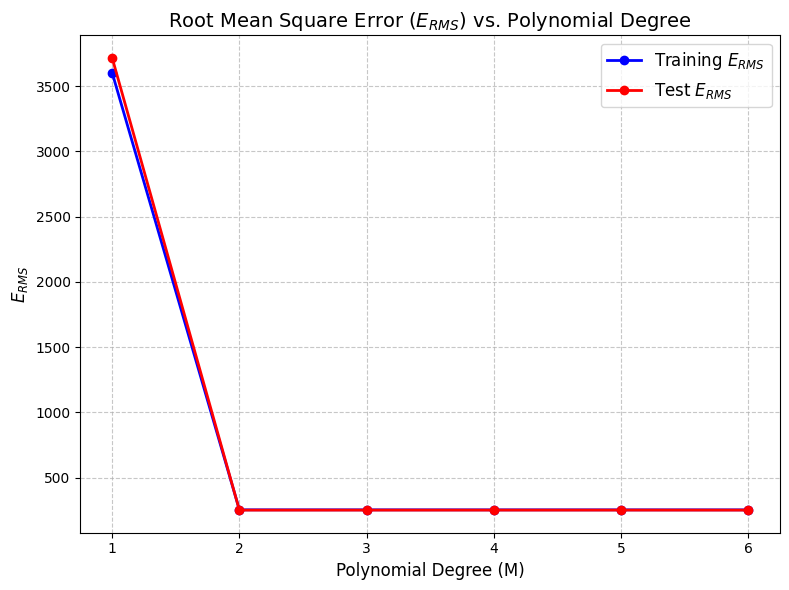

In [11]:
''' Plotting the Training ERMS and Test ERMS'''
srcu.plot_erms(degrees_to_test, train_errors, test_errors, 'Polynomial Degree (M)')